In [1]:
import torch
import numpy as np
import scipy.stats
import scipy.linalg
import itertools

## Simulating data in case 2-1

In case that `p(u_1)=p(u_2)=p(u_3)=p(u_4)=1/4`

In [2]:
def datgenerate(N):
    
    ### Parameter setting
    phat_u = np.array([1/4,1/4,1/4,1/4])
    sigma = 0.1
    fraclist_W = [[1-sigma*3,sigma,sigma,sigma],
                  [sigma,1-sigma*3,sigma,sigma],
                  [sigma,sigma,1-sigma*3,sigma],
                  [sigma,sigma,sigma,1-sigma*3]]
    fraclist_Z = [[1-sigma*3,sigma,sigma,sigma],
                  [sigma,1-sigma*3,sigma,sigma],
                  [sigma,sigma,1-sigma*3,sigma],
                  [sigma,sigma,sigma,1-sigma*3]]
    fraclist_X = np.array([
        [21/46, 18/43, 18/43, 18/43],
        [ 9/34, 21/71,  9/34,  9/34],
        [ 9/34,  9/34, 21/71,  9/34],
        [ 9/34,  9/34,  9/34, 21/71],
    ])
    fraclist_Y = np.array([
        [1,1],
        [0,1],
        [1,0],
        [0,0],
    ])
    
    ### Generating data
    U = np.array([scipy.stats.rv_discrete(values=(range(4), phat_u)).rvs() for i in range(N)])
    W = np.array([scipy.stats.rv_discrete(values=(range(4), fraclist_W[U[i]])).rvs() for i in range(N)])
    Z = np.array([scipy.stats.rv_discrete(values=(range(4), fraclist_Z[U[i]])).rvs() for i in range(N)])    
    X = np.array([scipy.stats.binom(1, fraclist_X[U[i],W[i]]).rvs() for i in range(N)])
    Y = np.array([scipy.stats.binom(1, fraclist_Y[U[i],X[i]]).rvs() for i in range(N)])

    return U,W,Z,X,Y

## Estimating P1, P0, Q1, and Q0

In [3]:
def calculate_PQ(X,Y,Z,W):
    phat_z0x1 = (np.sum((Z==0) & (X==1))/np.sum(X==1))
    phat_z1x1 = (np.sum((Z==1) & (X==1))/np.sum(X==1))
    phat_z2x1 = (np.sum((Z==2) & (X==1))/np.sum(X==1))
    phat_z3x1 = (np.sum((Z==3) & (X==1))/np.sum(X==1))
    phat_z0x0 = (np.sum((Z==0) & (X==0))/(np.sum(X==0)))
    phat_z1x0 = (np.sum((Z==1) & (X==0))/(np.sum(X==0)))
    phat_z2x0 = (np.sum((Z==2) & (X==0))/(np.sum(X==0)))
    phat_z3x0 = (np.sum((Z==3) & (X==0))/(np.sum(X==0)))
    phat_w0x1 = (np.sum((W==0) & (X==1))/np.sum(X==1))
    phat_w1x1 = (np.sum((W==1) & (X==1))/np.sum(X==1))
    phat_w2x1 = (np.sum((W==2) & (X==1))/np.sum(X==1))
    phat_w3x1 = (np.sum((W==3) & (X==1))/np.sum(X==1))
    phat_w0x0 = (np.sum((W==0) & (X==0))/(np.sum(X==0)))
    phat_w1x0 = (np.sum((W==1) & (X==0))/(np.sum(X==0)))
    phat_w2x0 = (np.sum((W==2) & (X==0))/(np.sum(X==0)))
    phat_w3x0 = (np.sum((W==3) & (X==0))/(np.sum(X==0)))
    phat_z0w0x1 = np.sum((Z==0) & (W==0) & (X==1))/np.sum(X==1)
    phat_z0w1x1 = np.sum((Z==0) & (W==1) & (X==1))/np.sum(X==1)
    phat_z0w2x1 = np.sum((Z==0) & (W==2) & (X==1))/np.sum(X==1)
    phat_z0w3x1 = np.sum((Z==0) & (W==3) & (X==1))/np.sum(X==1)
    phat_z0w0x0 = np.sum((Z==0) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z0w1x0 = np.sum((Z==0) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z0w2x0 = np.sum((Z==0) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z0w3x0 = np.sum((Z==0) & (W==3) & (X==0))/(np.sum(X==0))
    phat_z1w0x1 = np.sum((Z==1) & (W==0) & (X==1))/np.sum(X==1)
    phat_z1w1x1 = np.sum((Z==1) & (W==1) & (X==1))/np.sum(X==1)
    phat_z1w2x1 = np.sum((Z==1) & (W==2) & (X==1))/np.sum(X==1)
    phat_z1w3x1 = np.sum((Z==1) & (W==3) & (X==1))/np.sum(X==1)
    phat_z1w0x0 = np.sum((Z==1) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z1w1x0 = np.sum((Z==1) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z1w2x0 = np.sum((Z==1) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z1w3x0 = np.sum((Z==1) & (W==3) & (X==0))/(np.sum(X==0))
    phat_z2w0x1 = np.sum((Z==2) & (W==0) & (X==1))/np.sum(X==1)
    phat_z2w1x1 = np.sum((Z==2) & (W==1) & (X==1))/np.sum(X==1)
    phat_z2w2x1 = np.sum((Z==2) & (W==2) & (X==1))/np.sum(X==1)
    phat_z2w3x1 = np.sum((Z==2) & (W==3) & (X==1))/np.sum(X==1)
    phat_z2w0x0 = np.sum((Z==2) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z2w1x0 = np.sum((Z==2) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z2w2x0 = np.sum((Z==2) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z2w3x0 = np.sum((Z==2) & (W==3) & (X==0))/(np.sum(X==0))
    phat_z3w0x1 = np.sum((Z==3) & (W==0) & (X==1))/np.sum(X==1)
    phat_z3w1x1 = np.sum((Z==3) & (W==1) & (X==1))/np.sum(X==1)
    phat_z3w2x1 = np.sum((Z==3) & (W==2) & (X==1))/np.sum(X==1)
    phat_z3w3x1 = np.sum((Z==3) & (W==3) & (X==1))/np.sum(X==1)
    phat_z3w0x0 = np.sum((Z==3) & (W==0) & (X==0))/(np.sum(X==0))
    phat_z3w1x0 = np.sum((Z==3) & (W==1) & (X==0))/(np.sum(X==0))
    phat_z3w2x0 = np.sum((Z==3) & (W==2) & (X==0))/(np.sum(X==0))
    phat_z3w3x0 = np.sum((Z==3) & (W==3) & (X==0))/(np.sum(X==0))
    phat_y_x1 = (np.sum((Y==1) & (X==1))/np.sum(X==1))
    phat_y_x0 = (np.sum((Y==1) & (X==0))/np.sum(X==0))
    phat_yz0_x1 = (np.sum((Y==1) & (Z==0) & (X==1))/np.sum(X==1))
    phat_yz1_x1 = (np.sum((Y==1) & (Z==1) & (X==1))/np.sum(X==1))
    phat_yz2_x1 = (np.sum((Y==1) & (Z==2) & (X==1))/np.sum(X==1))
    phat_yz3_x1 = (np.sum((Y==1) & (Z==3) & (X==1))/np.sum(X==1))
    phat_yw0_x1 = (np.sum((Y==1) & (W==0) & (X==1))/np.sum(X==1))
    phat_yw1_x1 = (np.sum((Y==1) & (W==1) & (X==1))/np.sum(X==1))
    phat_yw2_x1 = (np.sum((Y==1) & (W==2) & (X==1))/np.sum(X==1))
    phat_yw3_x1 = (np.sum((Y==1) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz0_x0 = (np.sum((Y==1) & (Z==0) & (X==0))/np.sum(X==0))
    phat_yz1_x0 = (np.sum((Y==1) & (Z==1) & (X==0))/np.sum(X==0))
    phat_yz2_x0 = (np.sum((Y==1) & (Z==2) & (X==0))/np.sum(X==0))
    phat_yz3_x0 = (np.sum((Y==1) & (Z==3) & (X==0))/np.sum(X==0))
    phat_yw0_x0 = (np.sum((Y==1) & (W==0) & (X==0))/np.sum(X==0))
    phat_yw1_x0 = (np.sum((Y==1) & (W==1) & (X==0))/np.sum(X==0))
    phat_yw2_x0 = (np.sum((Y==1) & (W==2) & (X==0))/np.sum(X==0))
    phat_yw3_x0 = (np.sum((Y==1) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz0w0_x1 = (np.sum((Y==1) & (Z==0) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz0w1_x1 = (np.sum((Y==1) & (Z==0) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz0w2_x1 = (np.sum((Y==1) & (Z==0) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz0w3_x1 = (np.sum((Y==1) & (Z==0) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz1w0_x1 = (np.sum((Y==1) & (Z==1) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz1w1_x1 = (np.sum((Y==1) & (Z==1) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz1w2_x1 = (np.sum((Y==1) & (Z==1) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz1w3_x1 = (np.sum((Y==1) & (Z==1) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz2w0_x1 = (np.sum((Y==1) & (Z==2) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz2w1_x1 = (np.sum((Y==1) & (Z==2) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz2w2_x1 = (np.sum((Y==1) & (Z==2) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz2w3_x1 = (np.sum((Y==1) & (Z==2) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz3w0_x1 = (np.sum((Y==1) & (Z==3) & (W==0) & (X==1))/np.sum(X==1))
    phat_yz3w1_x1 = (np.sum((Y==1) & (Z==3) & (W==1) & (X==1))/np.sum(X==1))
    phat_yz3w2_x1 = (np.sum((Y==1) & (Z==3) & (W==2) & (X==1))/np.sum(X==1))
    phat_yz3w3_x1 = (np.sum((Y==1) & (Z==3) & (W==3) & (X==1))/np.sum(X==1))
    phat_yz0w0_x0 = (np.sum((Y==1) & (Z==0) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz0w1_x0 = (np.sum((Y==1) & (Z==0) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz0w2_x0 = (np.sum((Y==1) & (Z==0) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz0w3_x0 = (np.sum((Y==1) & (Z==0) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz1w0_x0 = (np.sum((Y==1) & (Z==1) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz1w1_x0 = (np.sum((Y==1) & (Z==1) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz1w2_x0 = (np.sum((Y==1) & (Z==1) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz1w3_x0 = (np.sum((Y==1) & (Z==1) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz2w0_x0 = (np.sum((Y==1) & (Z==2) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz2w1_x0 = (np.sum((Y==1) & (Z==2) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz2w2_x0 = (np.sum((Y==1) & (Z==2) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz2w3_x0 = (np.sum((Y==1) & (Z==2) & (W==3) & (X==0))/np.sum(X==0))
    phat_yz3w0_x0 = (np.sum((Y==1) & (Z==3) & (W==0) & (X==0))/np.sum(X==0))
    phat_yz3w1_x0 = (np.sum((Y==1) & (Z==3) & (W==1) & (X==0))/np.sum(X==0))
    phat_yz3w2_x0 = (np.sum((Y==1) & (Z==3) & (W==2) & (X==0))/np.sum(X==0))
    phat_yz3w3_x0 = (np.sum((Y==1) & (Z==3) & (W==3) & (X==0))/np.sum(X==0))
    phat_x1 = np.sum(X==1)/X.shape[0]
    phat_x0 = np.sum(X==0)/X.shape[0]

    ### Calculating P1, P0, Q1, Q0
    Phat1 = np.array([[1, phat_z0x1, phat_z1x1, phat_z2x1],
                     [phat_w0x1, phat_z0w0x1, phat_z1w0x1, phat_z2w0x1],
                     [phat_w1x1, phat_z0w1x1, phat_z1w1x1, phat_z2w1x1],
                     [phat_w2x1, phat_z0w2x1, phat_z1w2x1, phat_z2w2x1]])
    Phat0 = np.array([[1, phat_z0x0, phat_z1x0, phat_z2x0],
                     [phat_w0x0, phat_z0w0x0, phat_z1w0x0, phat_z2w0x0],
                     [phat_w1x0, phat_z0w1x0, phat_z1w1x0, phat_z2w1x0],
                     [phat_w2x0, phat_z0w2x0, phat_z1w2x0, phat_z2w2x0]])
    Qhat1 = np.array([[phat_y_x1, phat_yz0_x1, phat_yz1_x1, phat_yz2_x1],
                      [phat_yw0_x1, phat_yz0w0_x1, phat_yz1w0_x1, phat_yz2w0_x1],
                      [phat_yw1_x1, phat_yz0w1_x1, phat_yz1w1_x1, phat_yz2w1_x1],
                      [phat_yw2_x1, phat_yz0w2_x1, phat_yz1w2_x1, phat_yz2w2_x1]])
    Qhat0 = np.array([[phat_y_x0, phat_yz0_x0, phat_yz1_x0, phat_yz2_x0],
                      [phat_yw0_x0, phat_yz0w0_x0, phat_yz1w0_x0, phat_yz2w0_x0],
                      [phat_yw1_x0, phat_yz0w1_x0, phat_yz1w1_x0, phat_yz2w1_x0],
                      [phat_yw2_x0, phat_yz0w2_x0, phat_yz1w2_x0, phat_yz2w2_x0]])

    return Phat1, Phat0, Qhat1, Qhat0

In [4]:
np.random.seed(2021)
U,W,Z,X,Y = datgenerate(100)
Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)

## Estimating joint distribution of potential outcomes

In [5]:
def eval_perm1(S, P1, P0, Q1, Q0):
    P1 = torch.from_numpy(P1.astype(np.float32)).clone()
    P0 = torch.from_numpy(P0.astype(np.float32)).clone()
    Q1 = torch.from_numpy(Q1.astype(np.float32)).clone()
    Q0 = torch.from_numpy(Q0.astype(np.float32)).clone()

    PQ1 = np.dot(np.linalg.inv(P1), Q1)
    PQ1 = torch.from_numpy(PQ1.astype(np.float32)).clone()
    PQ0 = np.dot(np.linalg.inv(P0), Q0)
    PQ0 = torch.from_numpy(PQ0.astype(np.float32)).clone()

    Mx1 = np.array(
        [[1,0,0,0],
         [0,1,0,0],
         [0,0,0,0],
         [0,0,0,0]]
    )
    Mx0 = np.array(
        [[1,0,0,0],
         [0,0,0,0],
         [0,0,1,0],
         [0,0,0,0]]
    )
    Mx1 = torch.from_numpy(Mx1.astype(np.float32)).clone()
    Mx0 = torch.from_numpy(Mx0.astype(np.float32)).clone()

    diag1 = torch.mm(torch.mm(S, PQ1), torch.inverse(S))
    diag0 = torch.mm(torch.mm(S, PQ0), torch.inverse(S))
        
    loss = (
            torch.norm(diag1 - Mx1)**2 + torch.norm(diag0 - Mx0)**2
    )
    u1 = torch.mm(P1, torch.inverse(S))[0,:]
    u0 = torch.mm(P0, torch.inverse(S))[0,:]

    return loss,u1,u0,diag1,diag0

In [6]:
def commutabilitycheck(P1,P0,Q1,Q0):
    PQ1 = np.dot(np.linalg.inv(P1), Q1)
    PQ0 = np.dot(np.linalg.inv(P0), Q0)
    return np.linalg.norm(np.dot(PQ1, PQ0)-np.dot(PQ0,PQ1))

In [7]:
def optim(P1, P0, Q1, Q0, phat_x1, phat_x0, learning_rate = 1e-5, seed = None, maxiter=20000, rho=0.5):
    P1 = torch.from_numpy(P1.astype(np.float32)).clone()
    P0 = torch.from_numpy(P0.astype(np.float32)).clone()
    Q1 = torch.from_numpy(Q1.astype(np.float32)).clone()
    Q0 = torch.from_numpy(Q0.astype(np.float32)).clone()

    PQ1 = np.dot(np.linalg.inv(P1), Q1)
    PQ1 = torch.from_numpy(PQ1.astype(np.float32)).clone()
    PQ0 = np.dot(np.linalg.inv(P0), Q0)
    PQ0 = torch.from_numpy(PQ0.astype(np.float32)).clone()
    print("Commutability check:", commutabilitycheck(P1,P0,Q1,Q0))
    
    Mx1 = np.array(
        [[1,0,0,0],
         [0,1,0,0],
         [0,0,0,0],
         [0,0,0,0]]
    )
    Mx0 = np.array(
        [[1,0,0,0],
         [0,0,0,0],
         [0,0,1,0],
         [0,0,0,0]]
    )
    Mx1 = torch.from_numpy(Mx1.astype(np.float32)).clone()
    Mx0 = torch.from_numpy(Mx0.astype(np.float32)).clone()
    
    r1 = r0 = rho
    lambdavec1 = torch.zeros(4)
    lambdavec0  = torch.zeros(4)
    
    # Randomly initialize estimates
    if seed is not None:
        np.random.seed(seed)  
        torch.manual_seed(seed)      
    S = np.random.rand(4, 3)
    for i in range(4):
        for j in range(3):
            S[i,j] = (1 - S[i,:j].sum()) * np.random.rand(1)
    S = torch.from_numpy(S.astype(np.float32)).clone()
    S.requires_grad = True
    
    u1 = torch.mm(P1, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:]
    u0 = torch.mm(P0, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:]
    
    losslist = np.array([])
    for t in range(maxiter):
        diag1 = torch.mm(torch.mm(torch.cat([torch.ones(4,1),S], dim=1), PQ1), 
                         torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))
        diag0 = torch.mm(torch.mm(torch.cat([torch.ones(4,1),S], dim=1), PQ0), 
                         torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))
        u1 = torch.clamp(torch.mm(P1, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:], max=1, min=1e-4)
        u0 = torch.clamp(torch.mm(P0, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:], max=1, min=1e-4)

        f = torch.zeros(6)
        if torch.any((lambdavec1 + rho * (u1 - 1)) > 1):
            f1a = (
                (lambdavec1 * (u1 - 1))[(lambdavec1 + rho * (u1 - 1)) > 1] 
                + (rho/2) * torch.linalg.norm(u1[(lambdavec1 + rho * (u1 - 1)) > 1] - 1)**2
                  )
            f[0] = torch.sum(f1a)
        elif torch.any(lambdavec1 + rho * u1 < 1):
            f1b = (
                (lambdavec1 * u1)[(lambdavec1 + rho * u1) < 1] +
                (rho/2) * torch.linalg.norm(u1[(lambdavec1 + rho * u1) < 1])**2)
            f[1] = torch.sum(f1b)
        elif not (torch.any((lambdavec1 + rho * (u1 - 1)) > 1) or torch.any(lambdavec1 + rho * u1 < 1)):
            f1c = (- lambdavec1[not (any((lambdavec1 + rho * (u1 - 1)) > 1) or any((lambdavec1 + rho * u1) < 1))]**2 / (2*rho))
            f[2] = torch.sum(f1c)

        if torch.any((lambdavec0 + rho * (u0 - 1)) > 1):
            f0a = ((lambdavec0 * (u0 - 1))[(lambdavec0 + rho * (u0 - 1)) > 1] 
                + (rho/2) * torch.linalg.norm(u0[(lambdavec0 + rho * (u0 - 1)) > 1] - 1)**2)
            f[3] = torch.sum(f0a)
        elif torch.any((lambdavec0 + rho * u0) < 1):
            f0b = ((lambdavec0 * u0)[(lambdavec0 + rho * u0) < 1] 
                + (rho/2) * torch.linalg.norm(u0[(lambdavec0 + rho * u0) < 1])**2)
            f[4] = torch.sum(f0b)
        elif not (torch.any((lambdavec0 + rho * (u0 - 1)) > 1) or torch.any(lambdavec0 + rho * u0 < 1)):
            f0c = (- lambdavec0[not (any((lambdavec0 + rho * (u0 - 1)) > 1) or any((lambdavec0 + rho * u0) < 1))]**2 / (2*rho))
            f[5] = torch.sum(f0c)
        
        loss = (
            torch.norm(diag1 - Mx1) + torch.norm(diag0 - Mx0)
            + r1 * (torch.dot(torch.ones(4), u1) - 1) + rho/2  * (torch.dot(torch.ones(4), u1) - 1)**2
            + r0 * (torch.dot(torch.ones(4), u0) - 1) + rho/2  * (torch.dot(torch.ones(4), u0) - 1)**2
            + torch.sum(f)
        )
        loss.backward()

        with torch.no_grad():
            for i in range(4):
                for j in range(3):
                    S[i,j] = torch.clamp(S[i,j], max=1, min=1e-4)
                    if j>=1:
                        S[i,j] = torch.clamp(S[i,j], max=1-S[i,:j].sum()*0.5, min=1e-4)
                    
            S -= learning_rate * S.grad
            # Manually zero the gradients after updating estimates
            S.grad.zero_()
            
        r1 += rho * (torch.dot(torch.ones(4), u1.clone().detach()) - 1)
        r0 += rho * (torch.dot(torch.ones(4), u0.clone().detach()) - 1)

        if torch.any((lambdavec1.detach() + rho * (u1 - 1)) > 1):
            lambdavec1.detach()[(lambdavec1.detach() + rho * (u1 - 1)) > 1] = ((lambdavec1.detach() * (u1 - 1))[(lambdavec1.detach() + rho * (u1 - 1)) > 1] 
                + (rho/2) * torch.norm(u1[(lambdavec1.detach() + rho * (u1 - 1)) > 1] - 1)**2)
        elif torch.any((lambdavec1.detach() + rho * u1) < 1):
            lambdavec1.detach()[(lambdavec1.detach() + rho * u1) < 1] = ((lambdavec1.detach() * u1)[(lambdavec1.detach() + rho * u1) < 1] 
                + (rho/2) * torch.norm(u1[(lambdavec1.detach() + rho * u1) < 1])**2)    
        if torch.any((lambdavec0.detach() + rho * (u0 - 1)) > 1):
            lambdavec0.detach()[(lambdavec0.detach() + rho * (u0 - 1)) > 1] = ((lambdavec0.detach() * (u0 - 1))[(lambdavec0.detach() + rho * (u0 - 1)) > 1] 
                + (rho/2) * torch.norm(u0[(lambdavec0.detach() + rho * (u0 - 1)) > 1] - 1)**2)
        elif torch.any((lambdavec0.detach() + rho * u0) < 1):
            lambdavec0.detach()[(lambdavec0.detach() + rho * u0) < 1] = ((lambdavec0.detach() * u0)[(lambdavec0.detach() + rho * u0) < 1] 
                + (rho/2) * torch.norm(u0[(lambdavec0.detach() + rho * u0) < 1])**2)    
            
        if t % 1000 == 999:
            losslist = np.append(losslist, loss.item())
            print(t, loss.item(), torch.mm(P1, torch.inverse(torch.cat([torch.ones(4,1),S], dim=1)))[0,:])
            
    S = torch.cat([torch.ones(4,1),S], dim=1)

    loss_perm_list = []
    u1_list = []
    u0_list = []
    loss_min = np.inf 
#     print(S)
    for v in itertools.permutations([0,1,2,3], 4):
        loss_perm, u1_cand, u0_cand,diag1_cand,diag0_cand = eval_perm1(S[v,:], Phat1, Phat0, Qhat1, Qhat0)
        loss_perm += (r1 * (torch.dot(torch.ones(4), u1_cand) - 1) + rho/2  * (torch.dot(torch.ones(4), u1_cand) - 1)**2
            + r0 * (torch.dot(torch.ones(4), u0_cand) - 1) + rho/2  * (torch.dot(torch.ones(4), u0_cand) - 1)**2
            + torch.sum(f))
        loss_perm_list.append(loss_perm)
        u1_list.append(u1_cand)
        u0_list.append(u0_cand)
        if loss_perm < loss_min:
            loss_min = loss_perm
            S_hat = S[v,:]
            u1_hat = torch.mm(P1, torch.inverse(S_hat))[0,:]
            u0_hat = torch.mm(P0, torch.inverse(S_hat))[0,:]
    u_hat = u1_hat * phat_x1 + u0_hat * phat_x0
    return S.to('cpu').detach().numpy().copy(), S_hat.to('cpu').detach().numpy().copy(), u_hat.to('cpu').detach().numpy().copy(), u1_hat.to('cpu').detach().numpy().copy(), u0_hat.to('cpu').detach().numpy().copy(), loss_perm_list, loss_min

## Simulating proposed method

### n=100

In [ ]:
np.random.seed(2021)
for i in range(1000):
    print("iteration num: ",i)
    U,W,Z,X,Y = datgenerate(100)
    Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    
    if (np.linalg.cond(Phat1) >= 1/np.finfo(Phat1.dtype).eps) or (np.linalg.cond(Phat0) >= 1/np.finfo(Phat0.dtype).eps):
        print("Phat1 or Phat0 is singular...")
        continue
    if commutabilitycheck(Phat1,Phat0,Qhat1,Qhat0)>10000:
        print("Non-commutative...")
        continue
    
    S_cand_list = []
    S_hat_list = []
    u_hat_list = []
    u1_hat_list = []
    u0_hat_list = []
    losslist_list = []
    loss_min_list = []
    # Take minimum loss while repeating 5 times
    for k in range(5):
        print("Repeat: ",k)
        S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
            Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=0.5)
        print(u_hat,loss_min)
        cnt = 0 # counter for re-initialization
        while any(u_hat<0) | any(u_hat>1):
            cnt += 1
            print("Re-initialization...")        
            try:
                S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
                    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=0.5)
            except RuntimeError: # if S is singular
                print('Error')
                continue            
            print(u_hat,loss_min)

        S_cand_list.append(S_cand)
        S_hat_list.append(S_hat)
        u_hat_list.append(u_hat)
        u1_hat_list.append(u1_hat)
        u0_hat_list.append(u0_hat)
        losslist_list.append(losslist)
        loss_min_list.append(loss_min.detach())

#     S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#         Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=0.5)
#     print(u_hat)
#     cnt = 0 # counter for re-initialization
#     while any(u_hat<0) | any(u_hat>1):
#         cnt += 1
#         print("Re-initialization...")
#         S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#             Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=1.5)
#         print(u_hat)
    minidx = np.argmin(loss_min_list)
    u_hat = u_hat_list[minidx]
    print(u_hat,loss_min_list[minidx])

    u_hat[u_hat<0] = 0
    u_hat[u_hat>1] = 1
    if i==0:
        u_sim100_1000_type1 = [u_hat]
    else:
        u_sim100_1000_type1 = np.concatenate([u_sim100_1000_type1,[u_hat]],0)

iteration num:  0
Repeat:  0
Commutability check: 1.2990836
999 2.062411069869995 tensor([0.0783, 0.2635, 0.3962, 0.2621], grad_fn=<SliceBackward>)
1999 1.8317105770111084 tensor([0.0736, 0.2911, 0.2825, 0.3528], grad_fn=<SliceBackward>)
2999 1.825331449508667 tensor([0.0755, 0.3042, 0.2652, 0.3551], grad_fn=<SliceBackward>)
3999 1.8251348733901978 tensor([0.0759, 0.3065, 0.2623, 0.3553], grad_fn=<SliceBackward>)
4999 1.8252160549163818 tensor([0.0763, 0.3070, 0.2614, 0.3553], grad_fn=<SliceBackward>)
[0.35201985 0.2920184  0.07625797 0.27970374] tensor(1.3723, grad_fn=<AddBackward0>)
Repeat:  1
Commutability check: 1.2990836
999 3.7764196395874023 tensor([0.1173, 0.2980, 0.3730, 0.2116], grad_fn=<SliceBackward>)
1999 3.7494614124298096 tensor([0.1014, 0.2801, 0.3848, 0.2337], grad_fn=<SliceBackward>)
2999 3.733093738555908 tensor([0.0857, 0.2838, 0.3741, 0.2563], grad_fn=<SliceBackward>)
3999 3.713433265686035 tensor([0.0672, 0.2914, 0.3544, 0.2870], grad_fn=<SliceBackward>)
4999 3.68

In [60]:
import pandas as pd
round((pd.DataFrame(u_sim100_1000_type1)[1]-pd.DataFrame(u_sim100_1000_type1)[2]).describe(),3)

count    985.000
mean      -0.026
std        0.228
min       -0.906
25%       -0.107
50%       -0.015
75%        0.083
max        0.833
dtype: float64

In [59]:
import pandas as pd
round((pd.DataFrame(u_sim100_1000_type1)[1]).describe(),3)

count    985.000
mean       0.251
std        0.126
min        0.003
25%        0.176
50%        0.242
75%        0.305
max        0.890
Name: 1, dtype: float64

<AxesSubplot:>

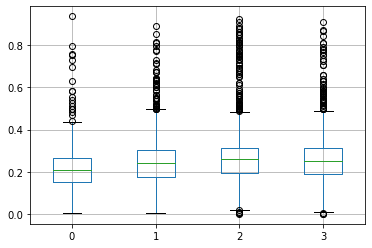

In [58]:
pd.DataFrame(u_sim100_1000_type1).boxplot()

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>]], dtype=object)

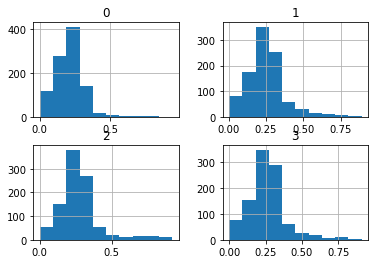

In [61]:
pd.DataFrame(u_sim100_1000_type1).hist()

### n=200

In [27]:
np.random.seed(2021)
for i in range(1000):
    print("iteration num: ",i)
    U,W,Z,X,Y = datgenerate(200)
    Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    
#     while np.where(Phat1==0, True, False).any() or np.where(Phat0==0, True, False).any() or np.where(Qhat1==0, True, False).any() or np.where(Qhat0==0, True, False).any():
#         print("Re-simulation...")
#         Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    if (np.linalg.cond(Phat1) >= 1/np.finfo(Phat1.dtype).eps) or (np.linalg.cond(Phat0) >= 1/np.finfo(Phat0.dtype).eps):
        print("Phat1 or Phat0 is singular...")
        continue
    if commutabilitycheck(Phat1,Phat0,Qhat1,Qhat0)>10000:
        print("Non-commutative...")
        continue

    S_cand_list = []
    S_hat_list = []
    u_hat_list = []
    u1_hat_list = []
    u0_hat_list = []
    losslist_list = []
    loss_min_list = []
    # Take minimum loss while repeating 5 times
    for k in range(5):
        print("Repeat: ",k)
        S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
            Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
        print(u_hat,loss_min)
        cnt = 0 # counter for re-initialization
        while any(u_hat<0) | any(u_hat>1):
            cnt += 1
            print("Re-initialization...")        
            try:
                S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
                    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
            except RuntimeError: # if S is singular
                print('Error')
                continue            
            print(u_hat,loss_min)

        S_cand_list.append(S_cand)
        S_hat_list.append(S_hat)
        u_hat_list.append(u_hat)
        u1_hat_list.append(u1_hat)
        u0_hat_list.append(u0_hat)
        losslist_list.append(losslist)
        loss_min_list.append(loss_min)

#     S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#         Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
#     print(u_hat)
#     cnt = 0 # counter for re-initialization
#     while any(u_hat<0) | any(u_hat>1):
#         cnt += 1
#         print("Re-initialization...")
#         S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#             Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
#         print(u_hat)
# #         if cnt == 5:
# #             print('!!BREAK!!')
# #             break
    minidx = np.argmin(loss_min_list)
    u_hat = u_hat_list[minidx]
    print(u_hat,loss_min_list[minidx])

    u_hat[u_hat<0] = 0
    u_hat[u_hat>1] = 1
    if i==0:
        u_sim200_1000_type1 = [u_hat]
    else:
        u_sim200_1000_type1 = np.concatenate([u_sim200_1000_type1,[u_hat]],0)

iteration num:  0
Repeat:  0
Commutability check: 1.3723946
999 3.9900519847869873 tensor([0.1967, 0.3123, 0.2137, 0.2773], grad_fn=<SliceBackward>)
1999 2.4628963470458984 tensor([0.0767, 0.3105, 0.3855, 0.2273], grad_fn=<SliceBackward>)
[0.37621498 0.18518542 0.14481708 0.29378253] tensor(1.6192, grad_fn=<AddBackward0>)
Repeat:  1
Commutability check: 1.3723946
999 3.599348545074463 tensor([0.2030, 0.0536, 0.4558, 0.2876], grad_fn=<SliceBackward>)
1999 3.506354331970215 tensor([0.2520, 0.0008, 0.4380, 0.3092], grad_fn=<SliceBackward>)
[0.21009193 0.27524313 0.29892102 0.21574382] tensor(2.1081, grad_fn=<AddBackward0>)
Repeat:  2
Commutability check: 1.3723946
999 2.685842752456665 tensor([-0.2575,  2.3029, -0.5720, -0.4734], grad_fn=<SliceBackward>)
1999 2.668851137161255 tensor([-0.3469,  2.6016, -0.5554, -0.6992], grad_fn=<SliceBackward>)
[-0.24192992 -1.1076026   2.973363   -0.6238303 ] tensor(3.2065, grad_fn=<AddBackward0>)
Re-initialization...
Commutability check: 1.3723946
999 

In [45]:
round((pd.DataFrame(u_sim200_1000_type1)[1]).describe(),3)

count    1000.000
mean        0.259
std         0.103
min         0.001
25%         0.210
50%         0.253
75%         0.294
max         0.915
Name: 1, dtype: float64

In [46]:
round((pd.DataFrame(u_sim200_1000_type1)[1]-pd.DataFrame(u_sim200_1000_type1)[2]).describe(),3)

count    1000.000
mean       -0.017
std         0.189
min        -0.936
25%        -0.076
50%        -0.006
75%         0.061
max         0.893
dtype: float64

### n=1000

In [39]:
np.random.seed(2021)
for i in range(1000):
    print("iteration num: ",i)
    U,W,Z,X,Y = datgenerate(1000)
    Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    
#     while np.where(Phat1==0, True, False).any() or np.where(Phat0==0, True, False).any() or np.where(Qhat1==0, True, False).any() or np.where(Qhat0==0, True, False).any():
#         print("Re-simulation...")
#         Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    if (np.linalg.cond(Phat1) >= 1/np.finfo(Phat1.dtype).eps) or (np.linalg.cond(Phat0) >= 1/np.finfo(Phat0.dtype).eps):
        print("Phat1 or Phat0 is singular...")
        continue
    if commutabilitycheck(Phat1,Phat0,Qhat1,Qhat0)>10000:
        print("Non-commutative...")
        continue

    S_cand_list = []
    S_hat_list = []
    u_hat_list = []
    u1_hat_list = []
    u0_hat_list = []
    losslist_list = []
    loss_min_list = []
    # Take minimum loss while repeating 5 times
    for k in range(5):
        print("Repeat: ",k)
        S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
            Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
        print(u_hat,loss_min)
        cnt = 0 # counter for re-initialization
        while any(u_hat<0) | any(u_hat>1):
            cnt += 1
            print("Re-initialization...")        
            try:
                S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
                    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
            except RuntimeError: # if S is singular
                print('Error')
                continue            
            print(u_hat,loss_min)

        S_cand_list.append(S_cand)
        S_hat_list.append(S_hat)
        u_hat_list.append(u_hat)
        u1_hat_list.append(u1_hat)
        u0_hat_list.append(u0_hat)
        losslist_list.append(losslist)
        loss_min_list.append(loss_min)

#     S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#         Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=0.5)
#     print(u_hat)
#     cnt = 0 # counter for re-initialization
#     while any(u_hat<0) | any(u_hat>1):
#         cnt += 1
#         print("Re-initialization...")
#         S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#             Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=1.5)
#         print(u_hat)
#         if i == 5:
#             print('!!BREAK!!')
#             break
    minidx = np.argmin(loss_min_list)
    u_hat = u_hat_list[minidx]
    print(u_hat,loss_min_list[minidx])

    u_hat[u_hat<0] = 0
    u_hat[u_hat>1] = 1
    if i==0:
        u_sim1000_1000_type1 = [u_hat]
    else:
        u_sim1000_1000_type1 = np.concatenate([u_sim1000_1000_type1,[u_hat]],0)

iteration num:  0
Repeat:  0
Commutability check: 0.39635262
999 3.665921449661255 tensor([0.2592, 0.2282, 0.2377, 0.2749], grad_fn=<SliceBackward>)
1999 3.1254594326019287 tensor([0.2517, 0.2282, 0.2457, 0.2745], grad_fn=<SliceBackward>)
[0.19538638 0.24952166 0.37185097 0.1832409 ] tensor(2.6782, grad_fn=<AddBackward0>)
Repeat:  1
Commutability check: 0.39635262
999 3.700183629989624 tensor([0.2108, 0.3495, 0.2733, 0.1665], grad_fn=<SliceBackward>)
1999 3.4367051124572754 tensor([0.2655, 0.2673, 0.2276, 0.2395], grad_fn=<SliceBackward>)
[0.18352169 0.29154235 0.29891855 0.22601733] tensor(2.6367, grad_fn=<AddBackward0>)
Repeat:  2
Commutability check: 0.39635262
999 3.212385654449463 tensor([0.2948, 0.3385, 0.2698, 0.0970], grad_fn=<SliceBackward>)
1999 2.9772684574127197 tensor([0.2792, 0.3419, 0.2821, 0.0968], grad_fn=<SliceBackward>)
[0.20422448 0.12851086 0.29512644 0.37213823] tensor(1.4664, grad_fn=<AddBackward0>)
Repeat:  3
Commutability check: 0.39635262
999 3.511888504028320

In [43]:
round((pd.DataFrame(u_sim1000_1000_type1)[1]).describe(),3)

count    1000.000
mean        0.264
std         0.082
min         0.008
25%         0.234
50%         0.258
75%         0.281
max         0.874
Name: 1, dtype: float64

In [44]:
round((pd.DataFrame(u_sim1000_1000_type1)[1]-pd.DataFrame(u_sim1000_1000_type1)[2]).describe(),3)

count    1000.000
mean       -0.013
std         0.139
min        -0.957
25%        -0.043
50%        -0.005
75%         0.034
max         0.867
dtype: float64

In [42]:
pd.DataFrame(u_sim1000_1000_type1).describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.213539     0.263781     0.276322     0.246358
std       0.058938     0.082157     0.096538     0.097352
min       0.002429     0.007995     0.006150     0.001835
25%       0.195205     0.234019     0.239951     0.219112
50%       0.226417     0.258048     0.262568     0.244296
75%       0.249185     0.280696     0.287952     0.267061
max       0.418181     0.873577     0.965403     0.911662

### n=5000

In [1]:
np.random.seed(2021)
for i in range(1000):
    print("iteration num: ",i)
    U,W,Z,X,Y = datgenerate(5000)
    Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    
#     while np.where(Phat1==0, True, False).any() or np.where(Phat0==0, True, False).any() or np.where(Qhat1==0, True, False).any() or np.where(Qhat0==0, True, False).any():
#         print("Re-simulation...")
#         Phat1, Phat0, Qhat1, Qhat0 = calculate_PQ(X,Y,Z,W)
    if (np.linalg.cond(Phat1) >= 1/np.finfo(Phat1.dtype).eps) or (np.linalg.cond(Phat0) >= 1/np.finfo(Phat0.dtype).eps):
        print("Phat1 or Phat0 is singular...")
        continue
    if commutabilitycheck(Phat1,Phat0,Qhat1,Qhat0)>10000:
        print("Non-commutative...")
        continue

    S_cand_list = []
    S_hat_list = []
    u_hat_list = []
    u1_hat_list = []
    u0_hat_list = []
    losslist_list = []
    loss_min_list = []
    # Take minimum loss while repeating 5 times
    for k in range(5):
        print("Repeat: ",k)
        S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
            Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
        print(u_hat,loss_min)
        cnt = 0 # counter for re-initialization
        while any(u_hat<0) | any(u_hat>1):
            cnt += 1
            print("Re-initialization...")        
            try:
                S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
                    Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=2000, learning_rate=5e-4, rho=0.5)
            except RuntimeError: # if S is singular
                print('Error')
                continue            
            print(u_hat,loss_min)

        S_cand_list.append(S_cand)
        S_hat_list.append(S_hat)
        u_hat_list.append(u_hat)
        u1_hat_list.append(u1_hat)
        u0_hat_list.append(u0_hat)
        losslist_list.append(losslist)
        loss_min_list.append(loss_min)

#     S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#         Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=0.5)
#     print(u_hat)
#     cnt = 0 # counter for re-initialization
#     while any(u_hat<0) | any(u_hat>1):
#         cnt += 1
#         print("Re-initialization...")
#         S_cand, S_hat, u_hat, u1_hat, u0_hat, losslist, loss_min = optim(
#             Phat1, Phat0, Qhat1, Qhat0, np.sum(X==1)/X.shape[0], np.sum(X==0)/X.shape[0], maxiter=5000, learning_rate=5e-4, rho=1.5)
#         print(u_hat)
#         if i == 5:
#             print('!!BREAK!!')
#             break
    minidx = np.argmin(loss_min_list)
    u_hat = u_hat_list[minidx]
    print(u_hat,loss_min_list[minidx])

    u_hat[u_hat<0] = 0
    u_hat[u_hat>1] = 1
    if i==0:
        u_sim5000_1000_type1 = [u_hat]
    else:
        u_sim5000_1000_type1 = np.concatenate([u_sim5000_1000_type1,[u_hat]],0)

NameError: name 'np' is not defined

In [73]:
round((pd.DataFrame(u_sim5000_1000_type1)[1]).describe(),3)

count    1000.000
mean        0.255
std         0.072
min         0.002
25%         0.241
50%         0.254
75%         0.271
max         0.726
Name: 1, dtype: float64

In [79]:
round((pd.DataFrame(u_sim5000_1000_type1)[1]-pd.DataFrame(u_sim5000_1000_type1)[2]).describe(),3)

count    1000.000
mean       -0.025
std         0.129
min        -0.864
25%        -0.033
50%        -0.005
75%         0.016
max         0.527
dtype: float64

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# plt.style.use('default')
sns.set()
sns.set(font_scale=1.4, font="Times New Roman")
sns.set_style('whitegrid')
sns.set_palette('Set3')

np.random.seed(2021)

df_PNS_1000_type1 = pd.DataFrame({
    'n= 100': np.concatenate([u_sim100_1000_type1[:,1],np.array([np.nan]*15)]),
    'n= 200': u_sim200_1000_type1[:,1],
    'n=1000': u_sim1000_1000_type1[:,1],
    'n=5000': u_sim5000_1000_type1[:,1]
})

df_CD_1000_type1 = pd.DataFrame({
    'n= 100': np.concatenate([u_sim100_1000_type1[:,1],np.array([np.nan]*15)]) - np.concatenate([u_sim100_1000_type1[:,2],np.array([np.nan]*15)]),
    'n= 200': u_sim200_1000_type1[:,1] - u_sim200_1000_type1[:,2],
    'n=1000': u_sim1000_1000_type1[:,1] - u_sim1000_1000_type1[:,2],
    'n=5000': u_sim5000_1000_type1[:,1] - u_sim5000_1000_type1[:,2]
})

# merge the two data frames to one data frame
df_PNS_melt_1000_type1 = pd.melt(df_PNS_1000_type1)
df_PNS_melt_1000_type1['Estimator'] = 'PNS'
df_CD_melt_1000_type1 = pd.melt(df_CD_1000_type1)
df_CD_melt_1000_type1['Estimator'] = 'Causal Risk Difference'

df_1000_type1 = pd.concat([df_PNS_melt_1000_type1, df_CD_melt_1000_type1], axis=0)
df_new_1000_type1 = df_1000_type1.rename(columns={'variable': 'size'})

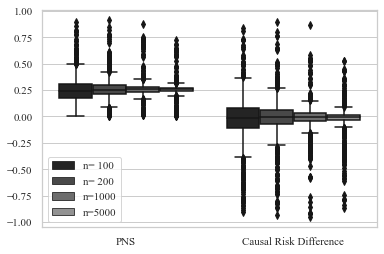

In [69]:
sns.set()
sns.set_style("darkgrid", {'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_style('whitegrid')
sns.set_palette('gray')

plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(x='Estimator', y='value', data=df_new_1000_type1, hue='size', ax=ax)

ax.set_xlabel('')
ax.set_ylabel('')
ax.legend().set_title('')

plt.show()

In [77]:
df_PNS_1000_type1.to_csv("PNS_1000_type1.csv")

In [78]:
df_CD_1000_type1.to_csv("CD_1000_type1.csv")

In [53]:
round(df_PNS_1000_type1.describe(),3)

n= 100    n= 200    n=1000
count  986.000  1000.000  1000.000
mean     0.251     0.242     0.251
std      0.136     0.126     0.144
min      0.008     0.003     0.002
25%      0.167     0.172     0.202
50%      0.247     0.245     0.256
75%      0.308     0.294     0.287
max      0.887     0.885     0.883

In [54]:
round(df_CD_1000_type1.describe(),3)

n= 100    n= 200    n=1000
count  986.000  1000.000  1000.000
mean    -0.019    -0.047    -0.041
std      0.240     0.251     0.280
min     -0.913    -0.941    -0.939
25%     -0.105    -0.112    -0.058
50%     -0.010    -0.016    -0.004
75%      0.091     0.068     0.048
max      0.861     0.859     0.819